<!DOCTYPE html>
<html>
<head>
    <style>
        body { font-family: Arial, sans-serif; margin: 40px; background: #f5f5f5; color: #333; line-height: 1.6; }
        h1 { text-align: center; color: #ff69b4; font-size: 36px; font-weight: bold; margin-bottom: 10px; }
        h2 { color: orange; font-size: 28px; font-weight: bold; margin-top: 30px; }
        h3 { color: #00FFFF; font-size: 22px; margin-top: 20px; }
        ul { margin-left: 20px; }
        li { margin: 8px 0; }
        hr { height: 2px; border: none; background-color: #ff69b4; margin: 20px 0; }
    </style>
</head>
<body>

<h1>🏪 PROJET : "L'ARCHIPEL DES TERRASSES PARISIENNES"</h1>
<h2 style="text-align:center; color:#ff69b4;">🔍 Analyse des clusters spontanés de terrasses commerciales à Paris</h2>
<hr>

<h2>🏪 1. Introduction</h2>
<p><strong>📌 Objectif :</strong></p>
<p>Ce projet vise à identifier et analyser les clusters spontanés de terrasses et étalages commerciaux à Paris.  
Comprendre ces patterns d'agglomération naturelle aide les urbanistes, investisseurs et commerçants à prendre des décisions éclairées.</p>

<h2>🛠️ Objectifs Clés</h2>
<ul>
    <li>🔄 Cartographier les clusters de terrasses par typologie</li>
    <li>📈 Analyser les corrélations spatiales entre établissements</li>
    <li>🏘️ Étudier l'influence des arrondissements sur la spécialisation</li>
    <li>🗺️ Identifier les "îles commerciales" extérieures spontanées</li>
</ul>

<h2>🔑 Définitions</h2>
<ul>
    <li>🏷️ <strong>Cluster Commercial :</strong> Regroupement naturel de terrasses similaires ou complémentaires. Exemples : zones de restaurants, corridors de cafés, concentrations d'étalages</li>
    <li>📊 <strong>Indice de Spécialisation :</strong> Concentration d'un type de terrasse dans une zone vs moyenne parisienne. Formule : (Type X terrasses / total terrasses en zone) × 100</li>
    <li>🌐 <strong>Écosystème Commercial Extérieur :</strong> Terrasses interagissant dans un espace, créant des synergies et complémentarités</li>
</ul>

<h2>🎯 Valeur Métier</h2>
<ul>
    <li>🏛️ Ville de Paris : Support décisionnel pour les autorisations de terrasses</li>
    <li>💼 Investisseurs : Identifier les zones sous-utilisées et opportunités de niche</li>
    <li>🛍️ Commerçants : Comprendre les écosystèmes locaux pour un positionnement optimal</li>
    <li>🏢 Urbanistes : Analyser les flux économiques et la vitalité des quartiers</li>
</ul>

<h2>👥 Parties Prenantes</h2>
<ul>
    <li>🏛️ Ville de Paris – Urbanisme et Développement Économique</li>
    <li>💼 Investisseurs Immobiliers – Promoteurs, sociétés foncières</li>
    <li>🛍️ Futurs Commerçants / Franchises</li>
    <li>🏢 Chambre de Commerce – Support aux entreprises</li>
    <li>🎓 Chercheurs en Économie Urbaine</li>
</ul>

<h2>📊 Critères de Succès</h2>
<ul>
    <li>🔍 Identifier au moins 5 clusters significatifs de terrasses</li>
    <li>📈 Mettre en lumière des corrélations spatiales contre-intuitives</li>
    <li>🎯 Produire des insights actionnables pour l'implantation commerciale</li>
    <li>📱 Créer des visualisations claires et pédagogiques</li>
</ul>

<h2>🚧 Contraintes</h2>
<ul>
    <li>📅 Délai : 5 jours</li>
    <li>💾 Données disponibles : 23,616 terrasses et étalages autorisés</li>
    <li>🔍 Qualité des données : Catégorisation des types de terrasses à uniformiser</li>
    <li>🌍 Périmètre : Paris intra-muros uniquement (20 arrondissements)</li>
    <li>✅ MVP : focus sur l'analyse spatiale des implantations extérieures</li>
</ul>

<h2>📋 Livrables</h2>
<ul>
    <li>📊 Rapport d'analyse complet avec méthodologie et résultats</li>
    <li>🗺️ Carte interactive des clusters identifiés</li>
    <li>📈 Tableau de bord des métriques clés</li>
    <li>💾 Code source et documentation technique</li>
    <li>🎤 Présentation synthétique pour les parties prenantes</li>
</ul>

</body>
</html>

**data understanding** 

In [ ]:
# %% Cellule 2: Installation et Import des Bibliothèques
print("📚 CHARGEMENT DES BIBLIOTHÈQUES...")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import folium
from folium.plugins import MarkerCluster
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


print("✅ Bibliothèques chargées avec succès!")

📚 CHARGEMENT DES BIBLIOTHÈQUES...
✅ Bibliothèques chargées avec succès!


In [11]:
# CHARGEMENT DES DONNÉES
print("📂 CHARGEMENT DES DONNÉES...")

df_raw = pd.read_csv('../data/raw/terrasses_paris.csv')

print(f"✅ DONNÉES BRUTES CHARGÉES : {len(df_raw):,} terrasses")
print(f"📊 Dimensions : {df_raw.shape[0]} lignes x {df_raw.shape[1]} colonnes")


📂 CHARGEMENT DES DONNÉES...
✅ DONNÉES BRUTES CHARGÉES : 5,000 terrasses
📊 Dimensions : 5000 lignes x 12 colonnes


**Exploration des colonnes brutes**

In [13]:
print("\n👀 APERÇU DES DONNÉES BRUTES :")
display(df_raw.head(3))

print("\n📋 TOUTES LES COLONNES DISPONIBLES :")
for i, col in enumerate(df_raw.columns, 1):
    print(f"   {i:2d}. {col} - Type: {df_raw[col].dtype}")

print(f"\n🎯 COLONNES IMPORTANTES IDENTIFIÉES :")
important_cols = []
for col in df_raw.columns:
    if any(keyword in col.lower() for keyword in ['type', 'arrondissement', 'adresse', 'geo', 'nom', 'enseigne']):
        important_cols.append(col)
        print(f"   ✅ {col}")

for col in important_cols:
    print(f"\n📊 Aperçu de '{col}':")
    print(df_raw[col].head(5))


👀 APERÇU DES DONNÉES BRUTES :


,typologie,adresse,arrondissement,nom_enseigne,nom_societe,siret,longueur,largeur,periode_installation,lien_affichette,geo_shape,geo_point_2d
0,CONTRE-TERRASSE OUVERTE,14 RUE DES PANOYAUX,75020.0,LOU PASCALOU,NaN,5.238441e+13,4.80,4.0,NaN,https://eudonet-terrasses.apps.paris.fr/xrm/at...,"{'type': 'Feature', 'geometry': {'coordinates'...","{'lon': 2.3854522524772896, 'lat': 48.86633009..."
1,TERRASSE OUVERTE,167 BOULEVARD VOLTAIRE,75011.0,NaN,NaN,5.128560e+13,7.65,2.0,NaN,https://eudonet-terrasses.apps.paris.fr/xrm/at...,"{'type': 'Feature', 'geometry': {'coordinates'...","{'lon': 2.3857018993955266, 'lat': 48.85464237..."
2,TERRASSE OUVERTE,16 RUE DU LOUVRE,75001.0,CHEZ ALEXANDRE,NaN,4.222180e+13,2.50,1.1,NaN,https://eudonet-terrasses.apps.paris.fr/xrm/at...,"{'type': 'Feature', 'geometry': {'coordinates'...","{'lon': 2.3410809317051617, 'lat': 48.86116698..."



📋 TOUTES LES COLONNES DISPONIBLES :
    1. typologie - Type: object
    2. adresse - Type: object
    3. arrondissement - Type: float64
    4. nom_enseigne - Type: object
    5. nom_societe - Type: object
    6. siret - Type: float64
    7. longueur - Type: float64
    8. largeur - Type: float64
    9. periode_installation - Type: object
   10. lien_affichette - Type: object
   11. geo_shape - Type: object
   12. geo_point_2d - Type: object

🎯 COLONNES IMPORTANTES IDENTIFIÉES :
   ✅ adresse
   ✅ arrondissement
   ✅ nom_enseigne
   ✅ nom_societe
   ✅ geo_shape
   ✅ geo_point_2d

📊 Aperçu de 'adresse':
0       14 RUE DES PANOYAUX
1    167 BOULEVARD VOLTAIRE
2          16 RUE DU LOUVRE
3       17 RUE LOUIS BONNET
4       65 RUE CAULAINCOURT
Name: adresse, dtype: object

📊 Aperçu de 'arrondissement':
0    75020.0
1    75011.0
2    75001.0
3    75011.0
4    75018.0
Name: arrondissement, dtype: float64

📊 Aperçu de 'nom_enseigne':
0              LOU PASCALOU
1                       NaN
2   

**QUALITÉ DES DONNÉES BRUTES**


In [17]:
print("\n🔍 ANALYSE DE LA QUALITÉ (BRUTES) :")

# Valeurs manquantes
missing_raw = df_raw.isnull().sum()
print("📊 VALEURS MANQUANTES PAR COLONNE :")
for col in df_raw.columns:
    if missing_raw[col] > 0:
        print(f"   ⚠️  {col:30} : {missing_raw[col]:6,} manquantes ({missing_raw[col]/len(df_raw)*100:5.1f}%)")

print(f"\n📈 STATISTIQUES DE QUALITÉ :")
print(f"   • Taux de complétude global : {(1 - missing_raw.sum() / (len(df_raw) * len(df_raw.columns))) * 100:.1f}%")
print(f"   • Colonnes sans données manquantes : {sum(missing_raw == 0)}/{len(df_raw.columns)}")
print(f"   • Colonnes avec +20% de données manquantes : {sum(missing_percent > 20)}")



# Graphique des valeurs manquantes
fig = px.bar(x=missing_data.index, y=missing_percent, 
             title='📊 POURCENTAGE DE VALEURS MANQUANTES PAR COLONNE',
             labels={'x': 'Colonnes', 'y': '% Valeurs Manquantes'},
             color=missing_percent,
             color_continuous_scale='reds')

fig.update_layout(xaxis_tickangle=-45, showlegend=False)
fig.show()

# Métriques de qualité
completeness = (1 - df_raw.isnull().sum().sum() / (len(df_raw) * len(df_raw.columns))) * 100



🔍 ANALYSE DE LA QUALITÉ (BRUTES) :
📊 VALEURS MANQUANTES PAR COLONNE :
   ⚠️  typologie                      :      2 manquantes (  0.0%)
   ⚠️  adresse                        :      2 manquantes (  0.0%)
   ⚠️  arrondissement                 :    150 manquantes (  3.0%)
   ⚠️  nom_enseigne                   :    155 manquantes (  3.1%)
   ⚠️  nom_societe                    :  4,847 manquantes ( 96.9%)
   ⚠️  siret                          :    175 manquantes (  3.5%)
   ⚠️  longueur                       :     16 manquantes (  0.3%)
   ⚠️  largeur                        :     24 manquantes (  0.5%)
   ⚠️  periode_installation           :  4,848 manquantes ( 97.0%)
   ⚠️  lien_affichette                :    923 manquantes ( 18.5%)

📈 STATISTIQUES DE QUALITÉ :
   • Taux de complétude global : 81.4%
   • Colonnes sans données manquantes : 2/12
   • Colonnes avec +20% de données manquantes : 2


**Analyse des données géographiques brutes**

In [ ]:
print("\n🗺️  ANALYSE DES DONNÉES GÉOGRAPHIQUES :")

geo_cols = [col for col in df_raw.columns if any(keyword in col.lower() for keyword in ['geo', 'lat', 'lon', 'coord'])]
print(f"📍 Colonnes géographiques trouvées : {geo_cols}")

for geo_col in geo_cols:
    print(f"\n📊 Analyse de '{geo_col}':")
    print(f"   • Type : {df_raw[geo_col].dtype}")
    print(f"   • Valeurs uniques : {df_raw[geo_col].nunique()}")
    print(f"   • Exemples : {df_raw[geo_col].dropna().head(3).tolist()}")
    
    sample_val = df_raw[geo_col].dropna().iloc[0] if not df_raw[geo_col].dropna().empty else "N/A"
    if isinstance(sample_val, str) and ',' in sample_val:
        print(f"   • Format : Coordonnées combinées (lat,lon)")
    else:
        print(f"   • Format : Simple")


🗺️  ANALYSE DES DONNÉES GÉOGRAPHIQUES :
📍 Colonnes géographiques trouvées : ['longueur', 'periode_installation', 'geo_shape', 'geo_point_2d']

📊 Analyse de 'longueur':
   • Type : float64
   • Valeurs uniques : 712
   • Exemples : [4.8, 7.65, 2.5]
   • Format : Simple

📊 Analyse de 'periode_installation':
   • Type : object
   • Valeurs uniques : 1
   • Exemples : ["Toute l'année", "Toute l'année", "Toute l'année"]
   • Format : Simple

📊 Analyse de 'geo_shape':
   • Type : object
   • Valeurs uniques : 4988
   • Exemples : ["{'type': 'Feature', 'geometry': {'coordinates': [2.3854522524772896, 48.866330091701045], 'type': 'Point'}, 'properties': {}}", "{'type': 'Feature', 'geometry': {'coordinates': [2.3857018993955266, 48.854642373630554], 'type': 'Point'}, 'properties': {}}", "{'type': 'Feature', 'geometry': {'coordinates': [2.3410809317051617, 48.86116698012297], 'type': 'Point'}, 'properties': {}}"]
   • Format : Coordonnées combinées (lat,lon)

📊 Analyse de 'geo_point_2d':
   • T

**Analyse des types et catégories brutes**

In [8]:
print("\n🏷️  ANALYSE DES CATÉGORIES ET TYPES :")

type_cols = [col for col in df_raw.columns if any(keyword in col.lower() for keyword in ['type', 'typologie', 'categorie', 'catégorie'])]
print(f"🎪 Colonnes de type trouvées : {type_cols}")

for type_col in type_cols:
    print(f"\n📊 Analyse de '{type_col}':")
    type_stats = df_raw[type_col].value_counts()
    print(f"   • Valeurs uniques : {type_stats.nunique()}")
    print(f"   • Top 5 valeurs :")
    for i, (val, count) in enumerate(type_stats.head().items(), 1):
        print(f"      {i}. {val} : {count:,}")


🏷️  ANALYSE DES CATÉGORIES ET TYPES :
🎪 Colonnes de type trouvées : ['typologie']

📊 Analyse de 'typologie':
   • Valeurs uniques : 24
   • Top 5 valeurs :
      1. TERRASSE OUVERTE : 1,892
      2. ETALAGE : 985
      3. CONTRE TERRASSE ESTIVALE SUR STATIONNEMENT : 464
      4. TERRASSE FERMÉE : 408
      5. TERRASSES OUVERTES SUR TROTTOIR : 346


**Analyse des arrondissements bruts**


🏙️  ANALYSE DES ARRONDISSEMENTS :
🏛️  Colonnes d'arrondissement trouvées : ['arrondissement']

📊 Analyse de 'arrondissement':
   • Arrondissements uniques : 20
   • Top 10 arrondissements :
       1. 75018.0 : 341 terrasses
       2. 75015.0 : 335 terrasses
       3. 75011.0 : 333 terrasses
       4. 75010.0 : 322 terrasses
       5. 75017.0 : 299 terrasses
       6. 75014.0 : 290 terrasses
       7. 75005.0 : 289 terrasses
       8. 75012.0 : 275 terrasses
       9. 75008.0 : 260 terrasses
      10. 75009.0 : 251 terrasses


/var/folders/gp/q_rht33j52g96p_m9v3ss8d80000gn/T/ipykernel_9189/196090423.py:23: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/zahra/Desktop/L'Archipel des Commerces Parisiens/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


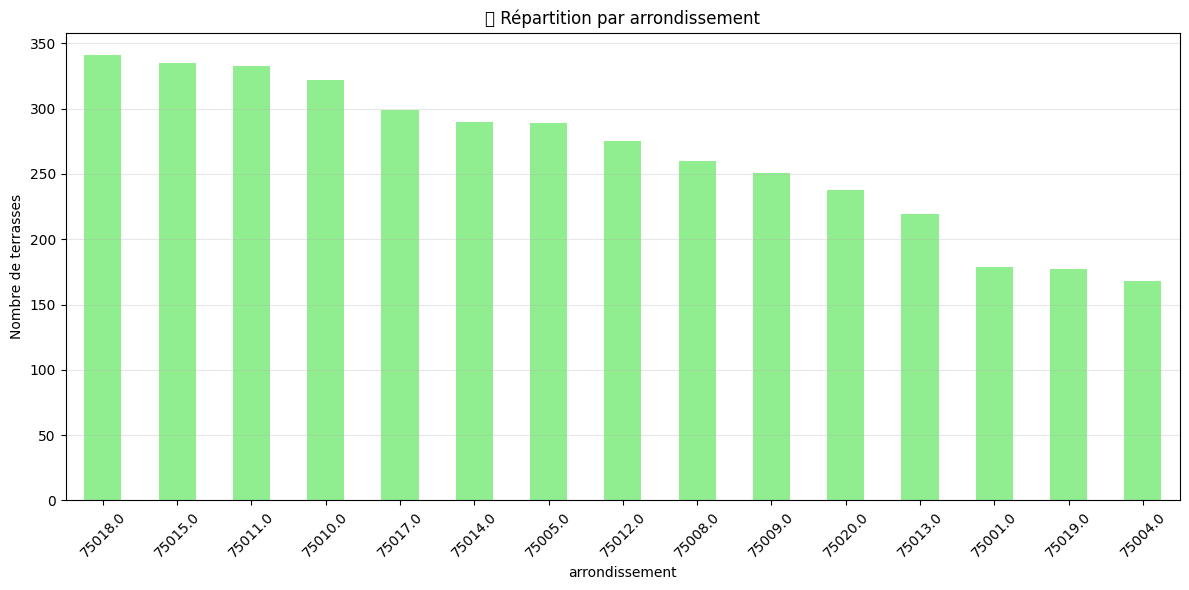

In [9]:
print("\n🏙️  ANALYSE DES ARRONDISSEMENTS :")

arr_cols = [col for col in df_raw.columns if any(keyword in col.lower() for keyword in ['arrondissement', 'arrdt', 'arr'])]
print(f"🏛️  Colonnes d'arrondissement trouvées : {arr_cols}")

for arr_col in arr_cols:
    print(f"\n📊 Analyse de '{arr_col}':")
    arr_stats = df_raw[arr_col].value_counts()
    print(f"   • Arrondissements uniques : {arr_stats.nunique()}")
    print(f"   • Top 10 arrondissements :")
    for i, (arr, count) in enumerate(arr_stats.head(10).items(), 1):
        print(f"      {i:2d}. {arr} : {count:,} terrasses")
    
    # Visualisation
    if arr_stats.nunique() > 0:
        plt.figure(figsize=(12, 6))
        arr_stats.head(15).plot(kind='bar', color='lightgreen')
        plt.title(f'📊 Répartition par {arr_col}')
        plt.xlabel(arr_col)
        plt.ylabel('Nombre de terrasses')
        plt.xticks(rotation=45)
        plt.grid(axis='y', alpha=0.3)
        plt.tight_layout()
        plt.show()